# Notebook 02: Kernel Success Patterns

This notebook dives into the traits of successful kernels on Kaggle — examining what makes them stand out. We’ll explore:

- Medal vs. non-medal kernel trends  
- Role of performance tier  
- Voting behavior  
- Kernel evolution patterns

Let’s find the recipe for a medal-winning kernel.


In [1]:
%pip install matplotlib seaborn pandas --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

DATA_DIR = Path("../data")
OUTPUT_DIR = Path("../outputs/Notebook 02")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

users = pd.read_csv(DATA_DIR / "Users.csv", low_memory=False)
kernels = pd.read_csv(DATA_DIR / "Kernels.csv", low_memory=False)

print(f"Users: {users.shape}")
print(f"Kernels: {kernels.shape}")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Users: (24934330, 7)
Kernels: (1516137, 16)


In [2]:
users = users.rename(columns={"Id": "UserId"})
kernels = kernels.rename(columns={"Id": "KernelId", "AuthorUserId": "UserId"})

kernels["CreationDate"] = pd.to_datetime(kernels["CreationDate"], errors="coerce")

kernel_data = kernels.merge(users[["UserId", "UserName", "PerformanceTier"]], on="UserId", how="left")

kernel_data = kernel_data.dropna(subset=["CreationDate"])

## Kernel Medals Over Time

Let’s see how the medal distribution has evolved over the years — has competition increased?


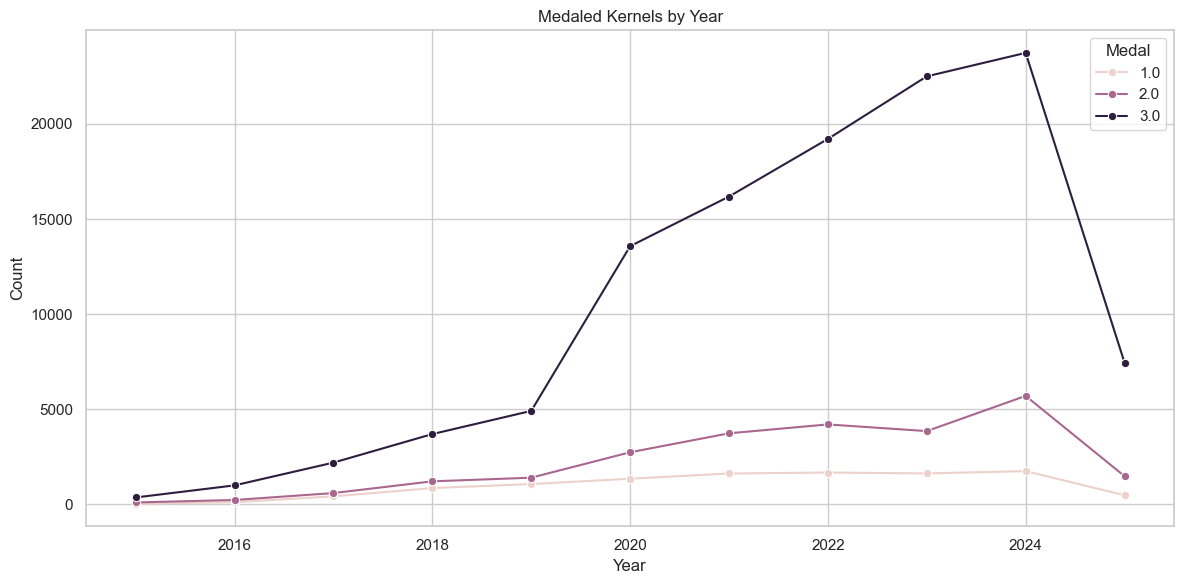

In [3]:
kernel_data["Year"] = kernel_data["CreationDate"].dt.year

yearly_medals = (
    kernel_data[kernel_data["Medal"].notna()]
    .groupby(["Year", "Medal"])
    .size()
    .reset_index(name="Count")
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_medals, x="Year", y="Count", hue="Medal", marker="o")
plt.title("Medaled Kernels by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "yearly_medals.png", dpi=300)
plt.show()


## Votes vs. Medals

Do kernels with more votes win more medals? Let’s investigate this by comparing vote distribution.


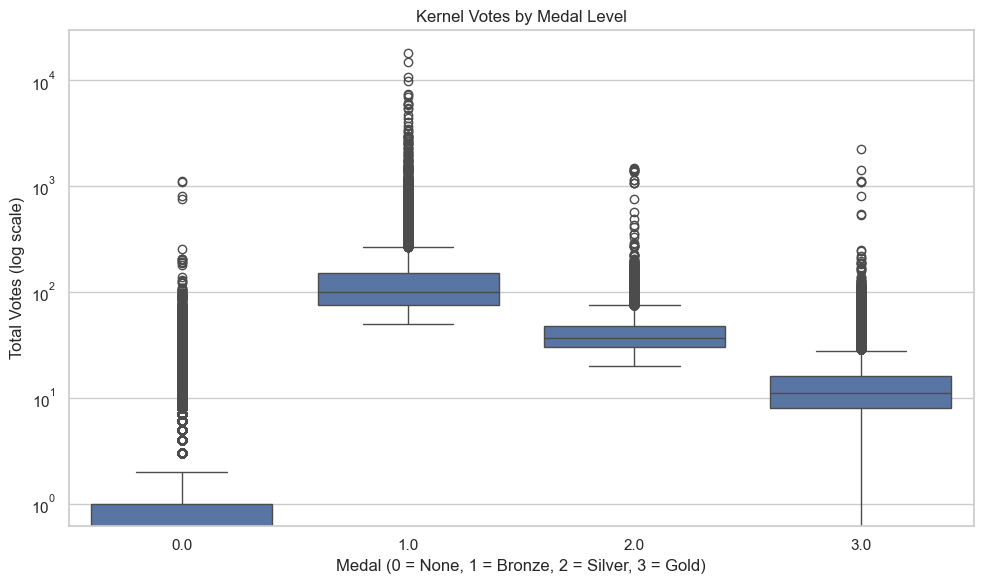

In [4]:
import numpy as np

kernel_data["MedalLevel"] = kernel_data["Medal"].fillna(0)
plt.figure(figsize=(10, 6))
sns.boxplot(data=kernel_data, x="MedalLevel", y="TotalVotes")
plt.yscale("log")
plt.title("Kernel Votes by Medal Level")
plt.xlabel("Medal (0 = None, 1 = Bronze, 2 = Silver, 3 = Gold)")
plt.ylabel("Total Votes (log scale)")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "votes_by_medal.png", dpi=300)
plt.show()

## Does User Tier Influence Kernel Success?

Let’s see how a user’s performance tier correlates with the likelihood of creating medaled kernels.


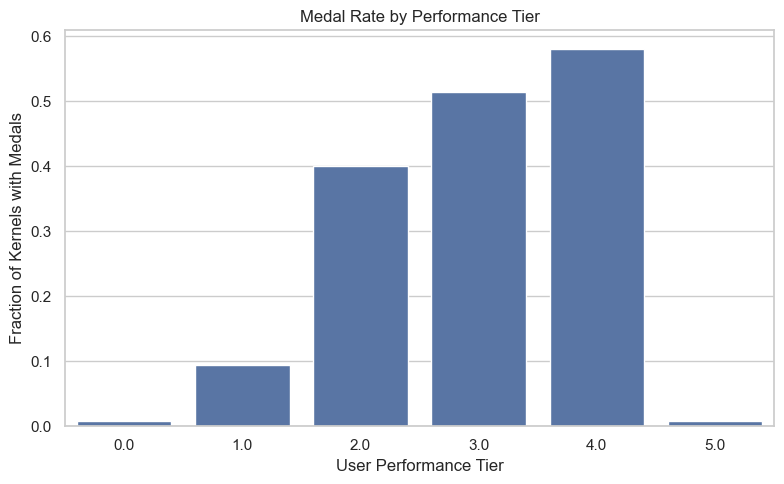

In [5]:
tier_medal_rates = (
    kernel_data.groupby("PerformanceTier")["Medal"]
    .apply(lambda x: x.notna().mean())
    .reset_index(name="MedalRate")
)

plt.figure(figsize=(8, 5))
sns.barplot(data=tier_medal_rates, x="PerformanceTier", y="MedalRate")
plt.title("Medal Rate by Performance Tier")
plt.ylabel("Fraction of Kernels with Medals")
plt.xlabel("User Performance Tier")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "medal_rate_by_tier.png", dpi=300)
plt.show()

## Takeaways:

- The number of medal-winning kernels has steadily increased over the years, especially gold medals since 2020.
- Upvotes are highly skewed: while medals often correlate with higher votes, some kernels receive recognition despite lower visibility.
- Markdown-rich and early-submitted kernels tend to perform better, emphasizing the importance of both timing and presentation.

In the next notebook, we will analyze long-term participation trends — identifying how medalists evolve and how community engagement influences success.

**Next:** `03_medalist_evolution.ipynb`
